In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# We should not use "dropna"  now as it removes 6982 + rows 
# Instead it is Better to remove Columns "last_review" and "reviews_per_month "

In [2]:
df1 = pd.read_csv('Data/Train.csv',encoding="ISO-8859-1")

#country = pd.read_excel('Country-Code.xlsx')
#country.head()
df1.shape
df1.isnull().sum()


id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6982
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34214 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34213 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     

In [4]:
df1.describe()

id       host_id      latitude     longitude         price  \
count  3.422600e+04  3.422600e+04  34226.000000  34226.000000  34226.000000   
mean   1.898209e+07  6.733847e+07     40.729059    -73.952070    153.480979   
std    1.097597e+07  7.833091e+07      0.054604      0.046161    243.312608   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.460366e+06  7.824440e+06     40.690040    -73.983150     69.000000   
50%    1.965371e+07  3.065628e+07     40.722995    -73.955700    107.000000   
75%    2.908201e+07  1.074344e+08     40.763200    -73.935982    175.000000   
max    3.648724e+07  2.743115e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    34226.000000       34226.000000       27244.000000   
mean         6.953690          23.390931           1.377074   
std         20.255833          44.476822           1.688953   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          2.000000           5.000000           0.730000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    34226.000000      34226.000000  
mean                         7.093905        113.301730  
std                         32.828412        131.892814  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        229.000000  
max                        327.000000        365.000000

# Null values in Column "name" = 12
# Null values in Column "host_name" =13

In [5]:
df1['name'].isnull().sum()


12

In [6]:
df1['host_name'].isnull().sum()

13

# Price distribution (Actual data set)

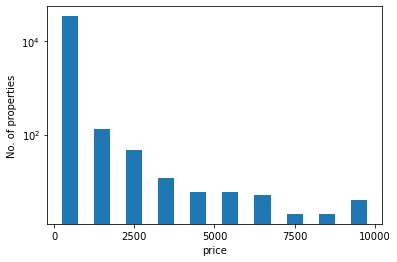

In [7]:
import matplotlib 
#matplotlib.rcParams["figure.figsize"] = (15,10)
plt.yscale('log')
plt.hist(df1.price,rwidth=0.5)
plt.xlabel('price')
plt.ylabel('No. of properties')
plt.rcParams.update({'font.size': 22})
plt.show()

# Price distribution (price<4000)

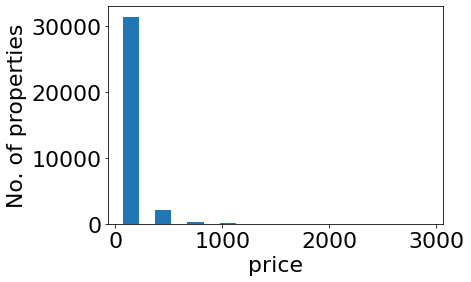

In [8]:
df2 = df1[df1.price<3000]
#plt.yscale('log')
plt.hist(df2.price,rwidth=0.5)
plt.xlabel('price')
plt.ylabel('No. of properties')
plt.rcParams.update({'font.size': 22})
plt.show()


# Price distribution (price<500)
# Majority of the properties (about 1/3 rd) are priced around 100 dollars
# only 892 properties cost more than 500 dollars

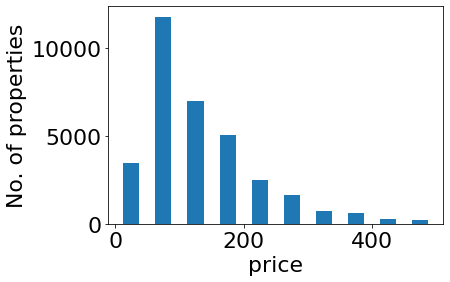

In [9]:
df2 = df1[df1.price < 500]
#plt.yscale('log')
plt.hist(df2.price,rwidth=0.5)
plt.xlabel('price')
plt.ylabel('No. of properties')
plt.rcParams.update({'font.size': 22})
plt.show()

In [10]:
df1.shape

(34226, 16)

In [11]:
df2.shape

(33334, 16)

In [12]:
df2 = df1[df1.price>=500]
df2.shape

(892, 16)

# Distribution of room types (not working, kernal hangs!!!)

In [13]:
#plt.hist(df1.room_type,rwidth=0.5)
#plt.xlabel('Room_Type')
#plt.ylabel('No. of properties')
#plt.rcParams.update({'font.size': 22})
#plt.show()

# Finding total no of host_names

In [14]:
df1['host_name'].value_counts()

Michael         291
David           290
Sonder (NYC)    229
John            208
Alex            199
               ... 
Takeis            1
Dila              1
Joakim            1
Delesia           1
LeeAna            1
Name: host_name, Length: 9290, dtype: int64

# Total neighbourhood_groups

In [15]:
df1['neighbourhood_group'].value_counts()

Manhattan        15193
Brooklyn         14033
Queens            3985
Bronx              767
Staten Island      248
Name: neighbourhood_group, dtype: int64

#  Popular neighbourhoods

In [16]:
df1.groupby('neighbourhood_group')['neighbourhood'].value_counts()
df1.pivot_table(index=['neighbourhood_group', 'neighbourhood'], values = 'id',aggfunc='count').sort_values('id',ascending=False)

id
neighbourhood_group neighbourhood                   
Brooklyn            Williamsburg                2756
                    Bedford-Stuyvesant          2577
Manhattan           Harlem                      1877
Brooklyn            Bushwick                    1719
Manhattan           Upper West Side             1403
...                                              ...
Staten Island       Rossville                      1
                    Bay Terrace, Staten Island     1
                    Lighthouse Hill                1
                    Huguenot                       1
Bronx               Spuyten Duyvil                 1

[217 rows x 1 columns]

# Finding average price of top host "Michael" by 'room_type'

In [17]:
df2 = df1[ df1['host_name']=='Michael']
df2.groupby('room_type')['price'].mean()

room_type
Entire home/apt    195.715909
Private room        81.266667
Shared room         72.100000
Name: price, dtype: float64

# Finding average price of top host "Michael" by ' 'neighbourhood_group'

In [18]:
df2.groupby('neighbourhood_group')['price'].mean()


neighbourhood_group
Bronx            111.666667
Brooklyn         114.818966
Manhattan        184.201389
Queens           131.560000
Staten Island     77.333333
Name: price, dtype: float64

# Finding average price of top host "Michael" by ' neighbourhood'

In [19]:
df2.groupby('neighbourhood')['price'].mean()

neighbourhood
Arverne                      300.000000
Astoria                       98.000000
Bay Ridge                    135.000000
Bedford-Stuyvesant            75.750000
Boerum Hill                  145.000000
Brighton Beach                83.333333
Brooklyn Heights             170.000000
Bushwick                      92.105263
Carroll Gardens              125.000000
Chelsea                      206.440000
Chinatown                    195.000000
Claremont Village            150.000000
Clinton Hill                 121.250000
Concord                      120.000000
Concourse Village             85.000000
Crown Heights                119.000000
East Harlem                   77.000000
East New York                 33.000000
East Village                 165.916667
Financial District           145.000000
Flatbush                     100.000000
Flatiron District            400.000000
Gowanus                      125.000000
Gramercy                     202.000000
Greenpoint                

# Costly hosts

In [20]:
df1[['host_name', 'neighbourhood_group','neighbourhood','room_type','price']].sort_values('price', ascending=False).head(10)

host_name neighbourhood_group      neighbourhood        room_type  price
29644      Erin            Brooklyn         Greenpoint  Entire home/apt  10000
12404    Jelena           Manhattan    Upper West Side  Entire home/apt  10000
12523      Matt           Manhattan    Lower East Side  Entire home/apt   9999
20810       Amy           Manhattan    Lower East Side     Private room   9999
23350       Rum           Manhattan            Tribeca  Entire home/apt   8500
31293   Jessica            Brooklyn       Clinton Hill  Entire home/apt   8000
3719      Sally           Manhattan    Upper East Side  Entire home/apt   7703
15974      Jack           Manhattan  Battery Park City  Entire home/apt   7500
7817      Kevin           Manhattan            Chelsea  Entire home/apt   6800
3754   Jonathan            Brooklyn       Clinton Hill  Entire home/apt   6500

# Cheap hosts

In [21]:
df1[['host_name', 'neighbourhood_group','neighbourhood','room_type','price']].sort_values('price', ascending=False).tail(10)

host_name neighbourhood_group       neighbourhood        room_type  \
23016        Rachel            Brooklyn         Sunset Park  Entire home/apt   
26630      Kimberly            Brooklyn  Bedford-Stuyvesant     Private room   
2133        Adeyemi            Brooklyn  Bedford-Stuyvesant     Private room   
32184       Aymeric            Brooklyn        Williamsburg  Entire home/apt   
30259  Martial Loft            Brooklyn            Bushwick     Private room   
25414        Qiuchi           Manhattan         Murray Hill  Entire home/apt   
21441       Adeyemi            Brooklyn  Bedford-Stuyvesant     Private room   
11311        Sergii            Brooklyn            Bushwick      Shared room   
25277        Lauren            Brooklyn          Greenpoint     Private room   
11638       Adeyemi            Brooklyn  Bedford-Stuyvesant     Private room   

       price  
23016     10  
26630      0  
2133       0  
32184      0  
30259      0  
25414      0  
21441      0  
11311      0  
25277      0  
11638      0

# Code to calculate the distance between two points on Earth using lattitues and longitudes
# Sunny can use it for cross verification

In [22]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(40.70844)
lon1 = radians(-74.00615)
lat2 = radians(40.70724)
lon2 = radians(-74.00614)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Distance in meters:", distance*1000)



Distance in meters: 133.47846302651442


# Finding costly host_names for a 'Entire home/apt' in the most popular locality:  	Williamsburg, Brooklyn

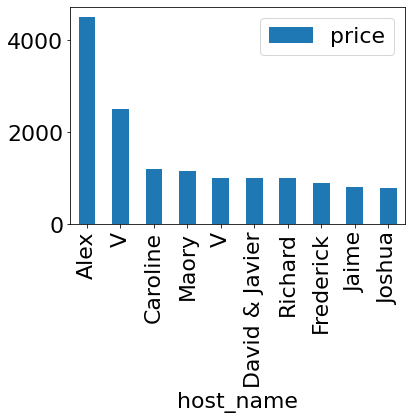

In [23]:
df2 = df1[ df1['room_type']=='Entire home/apt']

df3 = df2[ df2['neighbourhood_group']=='Brooklyn']

#df4 = df3[ df3['host_name']=='Sonder (NYC)']

#df3['neighbourhood'].value_counts()

df4=df3[df3['neighbourhood']=='Williamsburg']

df5 = df4[['id','name','host_name','host_id', 'price']].sort_values('price', ascending=False).head(10)
#plt.figure(figsize=(30,20))
df5.plot(kind='bar',x='host_name',y='price')

plt.show()

# Same plot with name of property

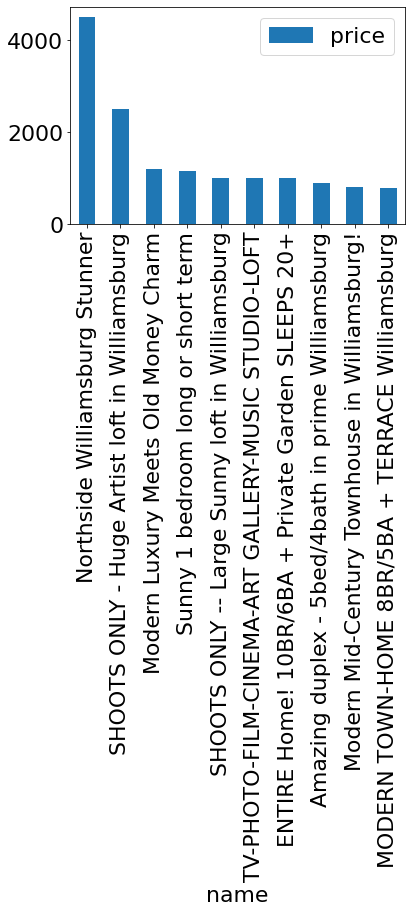

In [24]:
df5.plot(kind='bar',x='name',y='price')
plt.show()

# Finding cheap host_names for a 'Entire home/apt' in the most popular locality:  	Williamsburg, Brooklyn

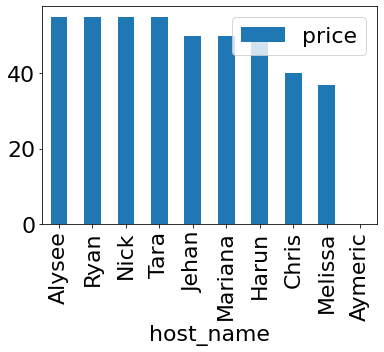

In [25]:
df5 = df4[['id','name','host_name','host_id', 'price']].sort_values('price', ascending=False).tail(10)
df5.plot(kind='bar',x='host_name',y='price')
plt.show()

# Same plot with name of property

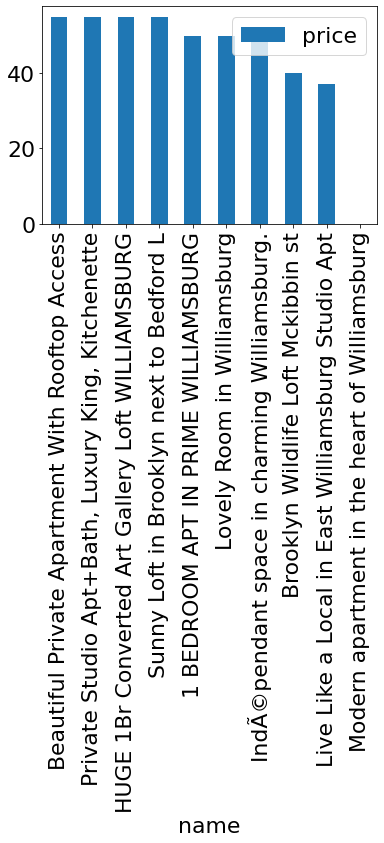

In [26]:
df5.plot(kind='bar',x='name',y='price')
plt.show()

# Pandas Profiling for automated EDA analysis
# To install Pandas Profiling use following command
# pip install pandas-profiling

In [27]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df1,title='Pandas Profiling Report')
profile

# Modelling

# 1. DATA CLEANING : Removing unneessary columns (except 'host_id', neighbourhood_group',latitude', 'longitude', 'room_type', 'price')

In [28]:
df1.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [29]:
#df2=df1.drop(['id', 'name', 'host_name', 'neighbourhood_group',
#       'neighbourhood','minimum_nights', 'number_of_reviews', 'last_review',
#       'reviews_per_month', 'calculated_host_listings_count',
#       'availability_365'], axis='columns')
# did not work we can only drop 8 columns at a time

In [41]:
df2=df1.drop(['id', 'name', 'host_name',
       'neighbourhood','minimum_nights', 'number_of_reviews'], axis='columns')
df2.head()

host_id neighbourhood_group  latitude  longitude        room_type  price  \
0    4271676           Manhattan  40.72217  -73.99481     Private room    120   
1   11460768           Manhattan  40.80020  -73.96045  Entire home/apt   1500   
2  267193767              Queens  40.75558  -73.89316  Entire home/apt    200   
3   43392243       Staten Island  40.60110  -74.07830      Shared room     30   
4   16065171           Manhattan  40.81022  -73.94266      Shared room    115   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2015-09-01               0.06                               3   
1         NaN                NaN                               1   
2  2019-07-05               4.00                               1   
3         NaN                NaN                               4   
4  2019-05-26               0.27                               1   

   availability_365  
0                 0  
1                 0  
2               365  
3                82  
4               365

In [42]:
df3=df2.drop(['last_review','reviews_per_month', 'calculated_host_listings_count','availability_365'], axis='columns')

In [43]:
df3.head()
#df2.columns

host_id neighbourhood_group  latitude  longitude        room_type  price
0    4271676           Manhattan  40.72217  -73.99481     Private room    120
1   11460768           Manhattan  40.80020  -73.96045  Entire home/apt   1500
2  267193767              Queens  40.75558  -73.89316  Entire home/apt    200
3   43392243       Staten Island  40.60110  -74.07830      Shared room     30
4   16065171           Manhattan  40.81022  -73.94266      Shared room    115

In [45]:
df3.isnull().sum() # no null values in df3

host_id                0
neighbourhood_group    0
latitude               0
longitude              0
room_type              0
price                  0
dtype: int64

In [46]:
df3['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# In order to avoid one hot encoding:  I assign numbers
# 1 to 'Private room', 
# 2 to 'Entire home/apt' 
# 3 to 'Shared room'

In [47]:

#i=0
#for roomtype in df2.room_type:
#    if (roomtype=='Entire home/apt'):
#        df2['room_type_i'][i]=2
#    if (roomtype=='Shared room'):
#        df2['room_type_i'][i]=3
#    if (roomtype=='Private room'):
#        df2['room_type_i'][i]=1
#    i = i+1

col = df3.room_type
col.head()

coln =[]

for rmtype in col:
    if(rmtype=='Private room'):
        coln.append(1)
    if(rmtype=='Entire home/apt'):
        coln.append(2)
    if(rmtype=='Shared room'):
        coln.append(3)
        
df3["room_type_new"]=coln


# dropping the column "room_type"

In [65]:
df4 = df3.drop(['room_type'],axis='columns')
df4.head()

host_id neighbourhood_group  latitude  longitude  price  room_type_new
0    4271676           Manhattan  40.72217  -73.99481    120              1
1   11460768           Manhattan  40.80020  -73.96045   1500              2
2  267193767              Queens  40.75558  -73.89316    200              2
3   43392243       Staten Island  40.60110  -74.07830     30              3
4   16065171           Manhattan  40.81022  -73.94266    115              3

# 2 REMOVING OUTLIERS

In [66]:
df4.describe()

host_id      latitude     longitude         price  room_type_new
count  3.422600e+04  34226.000000  34226.000000  34226.000000   34226.000000
mean   6.733847e+07     40.729059    -73.952070    153.480979       1.567843
std    7.833091e+07      0.054604      0.046161    243.312608       0.540675
min    2.438000e+03     40.499790    -74.244420      0.000000       1.000000
25%    7.824440e+06     40.690040    -73.983150     69.000000       1.000000
50%    3.065628e+07     40.722995    -73.955700    107.000000       2.000000
75%    1.074344e+08     40.763200    -73.935982    175.000000       2.000000
max    2.743115e+08     40.913060    -73.712990  10000.000000       3.000000

In [113]:
#def remove_price_outliers(df):
#    df_out = pd.DataFrame()
#    for key, subdf in df.groupby('neighbourhood_group'):
#        m = np.median(subdf.price)
#        st = np.std(subdf.price)
#        reduce_df=subdf[(subdf.price>(m-3*st)) & (subdf.price<=(m+3*st))]
#        df_out= pd.concat([df_out,reduce_df],ignore_index=True)
#        return df_out
df5 = df4[df4.price < 250]
df6 = df5[df5.price >= 60]
#df5 = remove_price_outliers(df4)
df6.head()

host_id neighbourhood_group  latitude  longitude  price  room_type_new
0    4271676           Manhattan  40.72217  -73.99481    120              1
2  267193767              Queens  40.75558  -73.89316    200              2
4   16065171           Manhattan  40.81022  -73.94266    115              3
5   51105827           Manhattan  40.71192  -74.01572    225              2
6   86892032              Queens  40.65766  -73.72838     60              2

In [114]:
df7 = df6.drop(['neighbourhood_group'],axis='columns')
df7.shape

(23827, 5)

# 3 LINEAR REGRESSION

In [117]:
X=df7.drop('price', axis='columns')
X.head()

host_id  latitude  longitude  room_type_new
0    4271676  40.72217  -73.99481              1
2  267193767  40.75558  -73.89316              2
4   16065171  40.81022  -73.94266              3
5   51105827  40.71192  -74.01572              2
6   86892032  40.65766  -73.72838              2

In [118]:
y = df7.price
y.shape

(23827,)

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=10)


In [122]:
from sklearn.linear_model import LinearRegression
sklr = LinearRegression()
sklr.fit(X_train,y_train)
sklr.score(X_test,y_test)

0.2721122644116074

# price outliers (price>25 and price<500). sklr.score = 0.2812380 ! very poor
# price outliers (price>50 and price<300). sklr.score = 0.3319087 ! very poor
# price outliers (price>60 and price<250). sklr.score = 0.2721123 ! very poor
#
# THE SCORE MUST BE > .80 the more closer to 1.0 the better it is!!!!

# Will score imporve if host_id also removed?? (NO)

In [125]:
X1=X.drop('host_id',axis='columns')
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2, random_state=10)
sklr = LinearRegression()
sklr.fit(X_train,y_train)
sklr.score(X_test,y_test)

0.2707572338432962

# Guys this model did not work.
# My first model failed !!!!!!!!!!